
# Divvy Bike Operating Report for the Year of 2017 
*DevUp 2.1 Capstone Project Source Code*


***
### Divvy Bike Data

**Goals**
1. Top 5 stations with the most starts (showing # of starts)
2. Trip duration by user type
3. Most popular trips based on start station and stop station
4. Rider performance by Gender and Age based on avg trip distance (station to station), median speed (distance traveled / trip duration)
5. What is the busiest bike in Chicago in 2017? How many times was it used? How many minutes was it in use?

Also: 
6. Build a model that can predict how long a trip will take given a starting point and destination. You will need to get creative about the factors that will predict travel time.

**Primary dataframes in this project:**
* df
    * Divvy bike trip data for Q1 - Q4 2017.
* df_stations
    * Divvy bike station coordinates and other identifying data
* unique_trips
    * Stations, coordinates and distances of unique trips completed in 2017, excluding round-trips.
* test
    * 10 random rows from unique_trips

---
**Merge, import and review data.**

Methods notes:
* Merge based on the solution found here: https://www.freecodecamp.org/news/how-to-combine-multiple-csv-files-with-8-lines-of-code-265183e0854/


Findings:
* The top from_station_name is Canal St & Adams St, so we can expect that to be first in our top 5 results
* start_time and end_time are object types, and may have to be converted to datetime64
* tripduration is int64 type, and may have to be converted to timedelta

In [1]:
# Install modules to merge data if needed
!pip3 install glob os pandas

ERROR: Could not find a version that satisfies the requirement glob (from versions: none)
ERROR: No matching distribution found for glob


In [2]:
import os
import glob
import pandas as pd
from pathlib import Path

# Set the current directory to the folder with all the Divvy Trip data. 
os.chdir('/Users/Ailin@ibm.com/Box/Ailin Cao - New Capstone Project')

# Confirm that you are in the correct directory.
print(os.getcwd())
print(os.listdir())

/Users/Ailin@ibm.com/Box/Ailin Cao - New Capstone Project
['.ipynb_checkpoints', 'CBDS DevUp - Data Scientist - Capstone Submission Sheet.docx', 'DevUp 2.1 Capstone Project - Ailin Cao-Copy1.ipynb', 'DevUp2.1 - #1 Capstone Prompt (1).docx', 'DevUp2.1 - #2 ReadMe Template (revised).docx', 'Divvy_Trips_2017_Q1Q2', 'Divvy_Trips_2017_Q3Q4', 'Misc.', 'Presentation2.pptx', 'Unique_Trips_Distances.csv', '~$Presentation2.pptx', '~$vUp2.1 - #2 ReadMe Template (revised).docx']


In [3]:
# Collect all csv files in the directory in combined_data list
extension = 'csv'
combined_data = [i for i in glob.glob('**/*.{}'.format(extension), recursive=True)]
print(combined_data)
print("Total Files Found: " + str(len(combined_data)))
print("\n")

# Combine the files into the appropriate list, either trip data or station data, based on file name
count = 0
for f in combined_data:
    if "Divvy_Trips_2017_Q1Q2/Divvy_Trips_2017_Q" in f or "Divvy_Trips_2017_Q3Q4/Divvy_Trips_2017_Q" in f:
        trips_csv = pd.concat([pd.read_csv(f)])
        print(f + " - trip")
        count = count + 1
        
    elif "Divvy_Trips_2017_Q1Q2/Divvy_Stations_2017_Q" in f or "Divvy_Trips_2017_Q3Q4/Divvy_Stations_2017_Q" in f:
        stations_csv = pd.concat([pd.read_csv(f)])
        print(f + " - station")
        count = count + 1

# Export each to csv
trips_csv.to_csv("Divvy_Trips_2017.csv", index=False, encoding='utf-8-sig')
stations_csv.to_csv("Divvy_Stations_2017.csv", index=False, encoding='utf-8-sig')
print("Total Files Merged: " + str(count))

['Unique_Trips_Distances.csv', 'Divvy_Trips_2017_Q1Q2/Divvy_Stations_2017_Q1Q2.csv', 'Divvy_Trips_2017_Q1Q2/Divvy_Trips_2017_Q1.csv', 'Divvy_Trips_2017_Q1Q2/Divvy_Trips_2017_Q2.csv', 'Divvy_Trips_2017_Q3Q4/Divvy_Stations_2017_Q3Q4.csv', 'Divvy_Trips_2017_Q3Q4/Divvy_Trips_2017_Q3.csv', 'Divvy_Trips_2017_Q3Q4/Divvy_Trips_2017_Q4.csv', 'Misc./1-501.csv', 'Misc./calculated_distances.csv']
Total Files Found: 9


Divvy_Trips_2017_Q1Q2/Divvy_Stations_2017_Q1Q2.csv - station
Divvy_Trips_2017_Q1Q2/Divvy_Trips_2017_Q1.csv - trip
Divvy_Trips_2017_Q1Q2/Divvy_Trips_2017_Q2.csv - trip
Divvy_Trips_2017_Q3Q4/Divvy_Stations_2017_Q3Q4.csv - station
Divvy_Trips_2017_Q3Q4/Divvy_Trips_2017_Q3.csv - trip
Divvy_Trips_2017_Q3Q4/Divvy_Trips_2017_Q4.csv - trip
Total Files Merged: 6


In [4]:
# Import csvs
url_trips = 'Divvy_Trips_2017.csv'
df = pd.read_csv(url_trips)

url_stations = 'Divvy_Stations_2017.csv'
df_stations = pd.read_csv(url_stations)

In [5]:
# Map latitude and longitude coordinates of the from and to stations to the main df
df['from_lat'] = df['from_station_id'].map(df_stations[['id', 'latitude']].set_index('id')['latitude'])
df['from_long'] = df['from_station_id'].map(df_stations[['id','longitude']].set_index('id')['longitude'])

df['to_lat'] = df['to_station_id'].map(df_stations[['id', 'latitude']].set_index('id')['latitude'])
df['to_long'] = df['to_station_id'].map(df_stations[['id','longitude']].set_index('id')['longitude'])

df.head(5)


trip_id        start_time          end_time  bikeid  tripduration  \
0  17536701  12/31/2017 23:58     1/1/2018 0:03    3304           284   
1  17536700  12/31/2017 23:54     1/1/2018 0:18    5975          1402   
2  17536699  12/31/2017 23:54     1/1/2018 0:18    4906          1441   
3  17536698  12/31/2017 23:48  12/31/2017 23:53    5667           315   
4  17536697  12/31/2017 23:42  12/31/2017 23:47    5353           272   

   from_station_id                    from_station_name  to_station_id  \
0              159            Claremont Ave & Hirsch St             69   
1              145  Mies van der Rohe Way & Chestnut St            145   
2              145  Mies van der Rohe Way & Chestnut St            145   
3              340            Clark St & Wrightwood Ave            143   
4              240         Sheridan Rd & Irving Park Rd            245   

                       to_station_name    usertype gender  birthyear  \
0               Damen Ave & Pierce Ave  Subscriber   Male     1988.0   
1  Mies van der Rohe Way & Chestnut St    Customer    NaN        NaN   
2  Mies van der Rohe Way & Chestnut St    Customer    NaN        NaN   
3            Sedgwick St & Webster Ave  Subscriber   Male     1963.0   
4           Clarendon Ave & Junior Ter  Subscriber   Male     1977.0   

    from_lat  from_long     to_lat    to_long  
0  41.907781 -87.685854  41.909396 -87.677692  
1  41.898587 -87.621915  41.898587 -87.621915  
2  41.898587 -87.621915  41.898587 -87.621915  
3  41.929546 -87.643118  41.922167 -87.638888  
4  41.954245 -87.654406  41.961004 -87.649603

In [6]:
# Get trip data dimensions
df.shape

(669239, 16)

In [7]:
# Get station data dimensions
# Note that README says
# Divvy_Stations_2017_Q1Q2 has 582 rows
# Divvy_Stations_2017_Q3Q4 has 586 rows
df_stations.shape

# There is data for 585 stations

(585, 8)

In [386]:
# Get overview of trip data
df.describe(include="all")

trip_id           start_time             end_time         bikeid  \
count   6.692390e+05               669239               669239  669239.000000   
unique           NaN                96140                96146            NaN   
top              NaN  2017-10-09 17:16:00  2017-10-19 17:39:00            NaN   
freq             NaN                   66                   58            NaN   
first            NaN  2017-10-01 00:00:00  2017-10-01 00:05:00            NaN   
last             NaN  2017-12-31 23:58:00  2018-01-01 00:18:00            NaN   
mean    1.713252e+07                  NaN                  NaN    3717.000296   
std     2.312134e+05                  NaN                  NaN    1978.768602   
min     1.673407e+07                  NaN                  NaN       1.000000   
25%     1.693282e+07                  NaN                  NaN    1966.000000   
50%     1.713069e+07                  NaN                  NaN    3905.000000   
75%     1.733437e+07                  NaN                  NaN    5590.000000   
max     1.753670e+07                  NaN                  NaN    6471.000000   

         tripduration  from_station_id    from_station_name  to_station_id  \
count   669239.000000    669239.000000               669239   669239.00000   
unique            NaN              NaN                  567            NaN   
top               NaN              NaN  Canal St & Adams St            NaN   
freq              NaN              NaN                12575            NaN   
first             NaN              NaN                  NaN            NaN   
last              NaN              NaN                  NaN            NaN   
mean       779.440499       183.954205                  NaN      183.26719   
std       1307.234185       133.798698                  NaN      133.94308   
min         60.000000         2.000000                  NaN        2.00000   
25%        347.000000        76.000000                  NaN       76.00000   
50%        567.000000       161.000000                  NaN      157.00000   
75%        940.000000       280.000000                  NaN      275.00000   
max      85466.000000       626.000000                  NaN      626.00000   

            to_station_name    usertype  ...      birthyear       from_lat  \
count                669239      669239  ...  590412.000000  669239.000000   
unique                  567           2  ...            NaN            NaN   
top     Canal St & Adams St  Subscriber  ...            NaN            NaN   
freq                  14554      591152  ...            NaN            NaN   
first                   NaN         NaN  ...            NaN            NaN   
last                    NaN         NaN  ...            NaN            NaN   
mean                    NaN         NaN  ...    1981.518929      41.897748   
std                     NaN         NaN  ...      11.018552       0.037580   
min                     NaN         NaN  ...    1918.000000      41.736646   
25%                     NaN         NaN  ...    1975.000000      41.880317   
50%                     NaN         NaN  ...    1985.000000      41.890573   
75%                     NaN         NaN  ...    1990.000000      41.915689   
max                     NaN         NaN  ...    2004.000000      42.064313   

            from_long         to_lat        to_long            age  age_group  \
count   669239.000000  669239.000000  669239.000000  590412.000000     587455   
unique            NaN            NaN            NaN            NaN          6   
top               NaN            NaN            NaN            NaN      25-35   
freq              NaN            NaN            NaN            NaN     277012   
first             NaN            NaN            NaN            NaN        NaN   
last              NaN            NaN            NaN            NaN        NaN   
mean       -87.642790      41.898115     -87.642936      38.481071        NaN   
std          0.022155       0.037749       0

In [385]:
df['start_time'].value_counts().sort_index()

2017-10-01 00:00:00     4
2017-10-01 00:01:00     3
2017-10-01 00:02:00     1
2017-10-01 00:03:00     1
2017-10-01 00:04:00     6
2017-10-01 00:05:00     1
2017-10-01 00:06:00     3
2017-10-01 00:07:00     5
2017-10-01 00:08:00     4
2017-10-01 00:09:00     4
2017-10-01 00:10:00     1
2017-10-01 00:11:00     2
2017-10-01 00:14:00     2
2017-10-01 00:15:00     2
2017-10-01 00:16:00     3
2017-10-01 00:17:00     2
2017-10-01 00:18:00     2
2017-10-01 00:19:00     1
2017-10-01 00:20:00     1
2017-10-01 00:21:00     4
2017-10-01 00:22:00     3
2017-10-01 00:23:00     4
2017-10-01 00:24:00     2
2017-10-01 00:25:00     1
2017-10-01 00:27:00     3
2017-10-01 00:28:00     2
2017-10-01 00:29:00     3
2017-10-01 00:30:00     2
2017-10-01 00:31:00     2
2017-10-01 00:32:00     3
2017-10-01 00:33:00     1
2017-10-01 00:36:00     2
2017-10-01 00:37:00     2
2017-10-01 00:38:00     2
2017-10-01 00:39:00     1
2017-10-01 00:40:00     3
2017-10-01 00:41:00     1
2017-10-01 00:42:00     1
2017-10-01 0

In [9]:
# Get overview of trip data types, and review for potential conversions needed
df.dtypes

trip_id                int64
start_time            object
end_time              object
bikeid                 int64
tripduration           int64
from_station_id        int64
from_station_name     object
to_station_id          int64
to_station_name       object
usertype              object
gender                object
birthyear            float64
from_lat             float64
from_long            float64
to_lat               float64
to_long              float64
dtype: object

---
**Clean Data**


In [282]:
# Import datetime to convert start time and end times
import datetime

In [293]:
# Convert to datetime
df[['start_time', 'end_time']] = df[['start_time', 'end_time']].apply(pd.to_datetime, format="%m/%d/%Y %H:%M")
df.head()

trip_id          start_time            end_time  bikeid  tripduration  \
0  17536701 2017-12-31 23:58:00 2018-01-01 00:03:00    3304           284   
1  17536700 2017-12-31 23:54:00 2018-01-01 00:18:00    5975          1402   
2  17536699 2017-12-31 23:54:00 2018-01-01 00:18:00    4906          1441   
3  17536698 2017-12-31 23:48:00 2017-12-31 23:53:00    5667           315   
4  17536697 2017-12-31 23:42:00 2017-12-31 23:47:00    5353           272   

   from_station_id                    from_station_name  to_station_id  \
0              159            Claremont Ave & Hirsch St             69   
1              145  Mies van der Rohe Way & Chestnut St            145   
2              145  Mies van der Rohe Way & Chestnut St            145   
3              340            Clark St & Wrightwood Ave            143   
4              240         Sheridan Rd & Irving Park Rd            245   

                       to_station_name    usertype  ... birthyear   from_lat  \
0               Damen Ave & Pierce Ave  Subscriber  ...    1988.0  41.907781   
1  Mies van der Rohe Way & Chestnut St    Customer  ...       NaN  41.898587   
2  Mies van der Rohe Way & Chestnut St    Customer  ...       NaN  41.898587   
3            Sedgwick St & Webster Ave  Subscriber  ...    1963.0  41.929546   
4           Clarendon Ave & Junior Ter  Subscriber  ...    1977.0  41.954245   

   from_long     to_lat    to_long   age  age_group        keys  Distance  \
0 -87.685854  41.909396 -87.677692  32.0      25-35   (69, 159)  0.653060   
1 -87.621915  41.898587 -87.621915   NaN        NaN       (145)  0.000000   
2 -87.621915  41.898587 -87.621915   NaN        NaN       (145)  0.000000   
3 -87.643118  41.922167 -87.638888  57.0      55-65  (340, 143)  0.580360   
4 -87.654406  41.961004 -87.649603  43.0      35-45  (240, 245)  0.719546   

      speed  
0  8.278224  
1  0.000000  
2  0.000000  
3  6.632681  
4  9.523409  

[5 rows x 21 columns]

In [294]:
# Check types to confirm successful conversion
df.describe(incl)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669239 entries, 0 to 669238
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   trip_id            669239 non-null  int64         
 1   start_time         669239 non-null  datetime64[ns]
 2   end_time           669239 non-null  datetime64[ns]
 3   bikeid             669239 non-null  int64         
 4   tripduration       669239 non-null  int64         
 5   from_station_id    669239 non-null  int64         
 6   from_station_name  669239 non-null  object        
 7   to_station_id      669239 non-null  int64         
 8   to_station_name    669239 non-null  object        
 9   usertype           669239 non-null  object        
 10  gender             590659 non-null  object        
 11  birthyear          590412 non-null  float64       
 12  from_lat           669239 non-null  float64       
 13  from_long          669239 non-null  float64 

In [12]:
# Check for nulls
# We see that they are only present under gender and birthyear, which are only important for the second to last question. 
# I decide to keep this data for now because it seems like a large portion of the dataset and the other more important columns are intact and usable.
df.isnull().sum()

trip_id                  0
start_time               0
end_time                 0
bikeid                   0
tripduration             0
from_station_id          0
from_station_name        0
to_station_id            0
to_station_name          0
usertype                 0
gender               78580
birthyear            78827
from_lat                 0
from_long                0
to_lat                   0
to_long                  0
dtype: int64

***
**Goal # 1: Find top 5 stations with the most starts (showing number of starts)**

Methods:
(from: https://stackoverflow.com/questions/44906754/unique-values-of-two-columns-for-pandas-dataframe)
* Obtain counts of from_station_id and from_station_name occurences in df, filter top 5 counts, and save to a new datafram df_from_stations
* Display data as a bar chart with matplotlib's .plot() 
                                            

In [39]:
# Create a dataframe of from_station_id/ from_station_name counts only
df_from_stations = df.groupby(['from_station_id', 'from_station_name']).size().reset_index(name='counts')

# Set index to from_station_name
df_from_stations.set_index('from_station_name', inplace=True)

df_from_stations.nlargest(5, ['counts'])

from_station_id  counts
from_station_name                                    
Canal St & Adams St                       192   12575
Clinton St & Washington Blvd               91   10232
Clinton St & Madison St                    77    9443
Streeter Dr & Grand Ave                    35    8775
Kingsbury St & Kinzie St                  133    7492

Text(0, 0.5, 'Station Name')

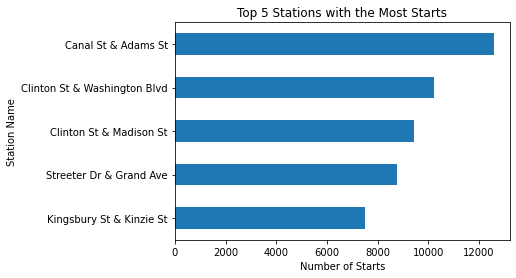

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Display from_station_counts as a bar chart of top 5 stations
# barh is a horizontal bar plot and it displays the data better
# Parameter y = 'counts' specifies to only plot counts, not from_station_id 
df_from_stations.nlargest(5, ['counts']).sort_values(['counts']).plot.barh(y='counts', legend=None)

# Add title
plt.title('Top 5 Stations with the Most Starts')
# Add x label
plt.xlabel('Number of Starts')
# Edit y label
plt.ylabel('Station Name')

In [ ]:
# Get a general overview of df_from_stations data
# You see there are 567 stations included out of 585 total
df_from_stations.describe(include="all")

In [35]:
# Find least popular stations
df_from_stations.nsmallest(5, ['counts'])

from_station_id  counts
from_station_name                                  
Kenton Ave & Madison St                 537       1
Ashland Ave & 66th St                   565       1
Ellis Ave & 83rd St                     584       1
Throop St & 52nd St                     556       2
Seeley Ave & Garfield Blvd              557       2

In [43]:
# Find the average trips per station
df_from_stations['counts'].mean() 

1180.31569664903

In [44]:
# Find the median number of trips.
df_from_stations['counts'].median() 

655.0

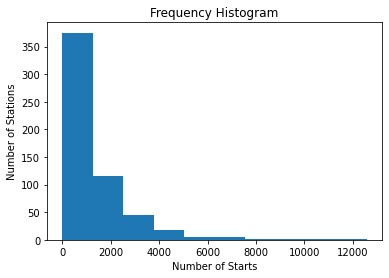

In [59]:
# Create a distribution plot of start counts
df_from_stations['counts'].hist()
plt.title('Frequency Histogram')
plt.xlabel('Number of Starts')
plt.ylabel('Number of Stations')
plt.grid(False)

In [15]:
# Install matplotlib if needed
!pip3 install matplotlib

In [18]:
# Plot locations of the top 5 stations using folium
! pip3 install folium

In [55]:
# This visualization shows all stations as circles
# Inspired by: https://blog.prototypr.io/interactive-maps-with-python-part-1-aa1563dbe5a9

import folium 
from folium.plugins import MarkerCluster
  
# create empty map zoomed in on Chicago
CHICAGO_COORDS = (41.8781,-87.6298)
map_dots = folium.Map(location=CHICAGO_COORDS,
                 tiles='Stamen Toner',
                 zoom_start=12)

for station in df_stations.iterrows():
    # most popular stations in blue
    if station[1].id in df_from_stations.nlargest(5, ['counts'])['from_station_id'].values:
        color='blue'
        radius=10
    # least popular stations in red
    elif station[1].id in df_from_stations.nsmallest(5, ['counts'])['from_station_id'].values:
        color='red'
        radius=10
    else:
        color='gray'
        radius=2
    folium.CircleMarker(location=(station[1].latitude,
                                  station[1].longitude),
                        radius=radius,
                        color=color,
                        fill=True).add_to(map_dots)
    
display(map_dots)
                    

---
**Goal # 2: Find trip duration by user type**

The Mayor wants to see:
* total number of trips
* total number of hours
* average trip in minutes
* median trip in minutes

Methods:
* Calculate above measures and display as a dataframe.
* Create a boxplot to illustrate data using seaborn .boxplot()

Findings:
* The values calculated look reasonable (e.g. 30 minute average trip).

In [60]:
# Install numpy if needed
!pip3 install numpy

In [295]:
# Create a new table by calculating total trips
df_usertypes = df.groupby('usertype')['trip_id'].nunique().to_frame()
# Rename the column from trip_id to Total Trips
df_usertypes.rename(columns={'trip_id':'Total Trips'}, inplace=True)
df_usertypes

# Calculate total hours; note that currently trip duration is in seconds
total_hours = df.groupby('usertype')['tripduration'].sum() / (60 * 60)

# Append to df_usertypes
df_usertypes['Total Hours'] = total_hours

# Calculate average trip time in minutes
avg_trip = df.groupby('usertype')['tripduration'].mean() / 60

# Append to df_usertypes
df_usertypes['Average (mins)'] = avg_trip

# Calculate median trip time in minutes
median_trip = df.groupby('usertype')['tripduration'].median() / 60

# Append calculated to df_usertypes
df_usertypes['Median (mins)'] = median_trip 

# Display dataframe
df_usertypes

# TO DO: It may be useful to see the time values as hours, minutes, and seconds.

Total Trips    Total Hours  Average (mins)  Median (mins)
usertype                                                             
Customer          78087   39275.872778       30.178549      22.283333
Subscriber       591152  105621.899444       10.720278       8.616667

In [76]:
# Find how many more trips subscribers take than customers
df_usertypes.loc['Subscriber','Total Trips'] / df_usertypes.loc['Customer','Total Trips'] 

7.5704278561092115

In [77]:
# Find out how much longer customer trips were
df_usertypes.loc['Customer','Average (mins)'] / df_usertypes.loc['Subscriber','Average (mins)'] 

2.815090079934458

In [62]:
# Install seaborn if needed
! pip3 install seaborn

Text(0, 0.5, 'Trip Duration (s)')

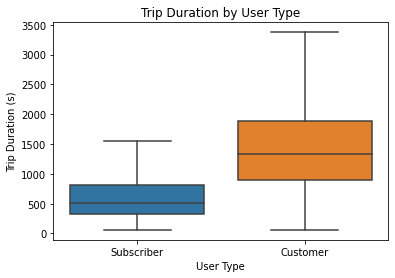

In [63]:
import seaborn as sns

# See the relationship between "usertype" and "tripduration" as a box plot.
# showfliers=False hides outliers
sns.boxplot(x="usertype", y="tripduration", data=df, showfliers=False)

# Add title
plt.title('Trip Duration by User Type')
# Add x label
plt.xlabel('User Type')
plt.ylabel('Trip Duration (s)')

Text(0, 0.5, 'User Type')

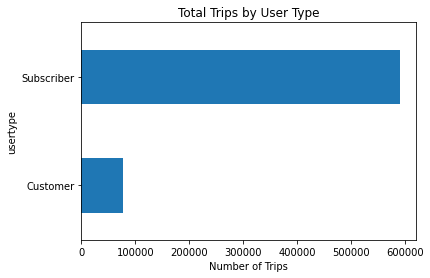

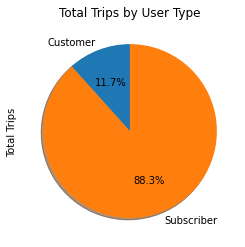

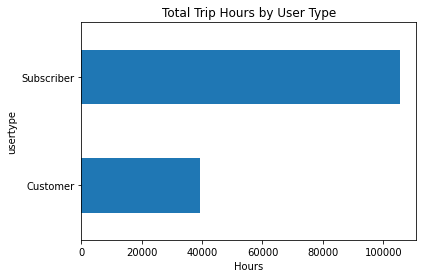

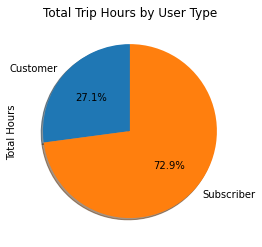

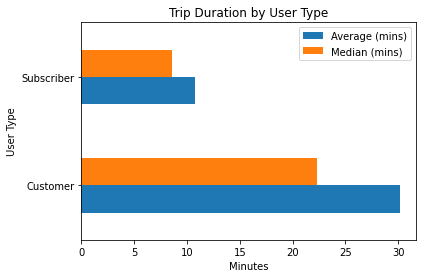

In [68]:
# It may be helpful to visualize the following as pie charts and bar charts:
# User type counts
# Total trips by user type
# Total trip duration by user type

# Plot bar of total trips
# You can see that subscribers make far more trips while customers book fewer trips, but take proportionally longer trips
df_usertypes.plot.barh(y='Total Trips').get_legend().remove()
# Add title
plt.title('Total Trips by User Type')
# Add x label
plt.xlabel('Number of Trips')


# Plot pie of total trips
df_usertypes.plot.pie(y='Total Trips', 
                     autopct='%1.1f%%',
                      startangle=90,
                      shadow=True,
                      labels=df_usertypes.index,
                      pctdistance=.6,
).get_legend().remove()

plt.title('Total Trips by User Type')


# Plot bar of total minutes
df_usertypes.plot.barh(y='Total Hours').get_legend().remove()
# Add title
plt.title('Total Trip Hours by User Type')
# Add x label
plt.xlabel('Hours')

# Plot pie of total minutes
df_usertypes.plot.pie(y='Total Hours', 
                     autopct='%1.1f%%',
                      startangle=90,
                      shadow=True,
                      labels=df_usertypes.index,
                      pctdistance=.6,
).get_legend().remove()

plt.title('Total Trip Hours by User Type')


# Plot bar of average and median trip time
df_usertypes.plot.barh(y=['Average (mins)', 'Median (mins)'])
# Add title
plt.title('Trip Duration by User Type')
# Add x label
plt.xlabel('Minutes')
plt.ylabel('User Type')


---
**Goal # 3: Find most popular trips based on start station and stop station**

Methods:
* Calculate above measures and display as a dataframe.
* Create a boxplot to illustrate data using seaborn .boxplot()

In [83]:
df

trip_id        start_time          end_time  bikeid  tripduration  \
0       17536701  12/31/2017 23:58     1/1/2018 0:03    3304           284   
1       17536700  12/31/2017 23:54     1/1/2018 0:18    5975          1402   
2       17536699  12/31/2017 23:54     1/1/2018 0:18    4906          1441   
3       17536698  12/31/2017 23:48  12/31/2017 23:53    5667           315   
4       17536697  12/31/2017 23:42  12/31/2017 23:47    5353           272   
...          ...               ...               ...     ...           ...   
669234  16734070    10/1/2017 0:01    10/1/2017 0:15    1099           837   
669235  16734069    10/1/2017 0:00    10/1/2017 0:07    3688           366   
669236  16734068    10/1/2017 0:00    10/1/2017 0:05    1416           264   
669237  16734067    10/1/2017 0:00    10/1/2017 0:06    5396           361   
669238  16734066    10/1/2017 0:00    10/1/2017 0:12    5802           741   

        from_station_id                    from_station_name  to_station_id  \
0                   159            Claremont Ave & Hirsch St             69   
1                   145  Mies van der Rohe Way & Chestnut St            145   
2                   145  Mies van der Rohe Way & Chestnut St            145   
3                   340            Clark St & Wrightwood Ave            143   
4                   240         Sheridan Rd & Irving Park Rd            245   
...                 ...                                  ...            ...   
669234              289                Wells St & Concord Ln            226   
669235               45         Michigan Ave & Congress Pkwy             52   
669236              520           Greenview Ave & Jarvis Ave            447   
669237              288           Larrabee St & Armitage Ave            289   
669238              135                 Halsted St & 21st St            129   

                            to_station_name    usertype  gender  birthyear  \
0                    Damen Ave & Pierce Ave  Subscriber    Male     1988.0   
1       Mies van der Rohe Way & Chestnut St    Customer     NaN        NaN   
2       Mies van der Rohe Way & Chestnut St    Customer     NaN        NaN   
3                 Sedgwick St & Webster Ave  Subscriber    Male     1963.0   
4                Clarendon Ave & Junior Ter  Subscriber    Male     1977.0   
...                                     ...         ...     ...        ...   
669234             Racine Ave & Belmont Ave  Subscriber    Male     1991.0   
669235               Michigan Ave & Lake St    Customer     NaN        NaN   
669236             Glenwood Ave & Morse Ave    Customer     NaN        NaN   
669237                Wells St & Concord Ln  Subscriber  Female     1984.0   
669238            Blue Island Ave & 18th St  Subscriber  Female     1994.0   

         from_lat  from_long     to_lat    to_long   age age_group  
0       41.907781 -87.685854  41.909396 -87.677692  32.0     25-35  
1       41.898587 -87.621915  41.898587 -87.621915   NaN       NaN  
2       41.898587 -87.621915  41.898587 -87.621915   NaN       NaN  
3       41.929546 -87.643118  41.922167 -87.638888  57.0     55-65  
4       41.954245 -87.654406  41.961004 -87.649603  43.0     35-45  
...           ...        ...        ...        ...   ...       ...  
669234  41.912133 -87.634656  41.939743 -87.658865  29.0     25-35  
669235  41.876243 -87.624426  41.886024 -87.624117   NaN       NaN  
669236  42.015962 -87.668570  42.007972 -87.665502   NaN       NaN  
669237  41.918084 -87.643749  41.912133 -87.634656  36.0     35-45  
669238  41.853780 -87.646650  41.857556 -87.661535  26.0     25-35  

[669239 rows x 18 columns]

In [180]:
# Group by unique pairs of from_station_name and to_station_name
df_unique_trips = df.groupby(['from_station_name', 'from_lat', 'from_long', 'to_station_name', 'to_lat', 'to_long']).size().reset_index(name='Freq')
df_unique_trips.nlargest(6, ['Freq'])

# We see that the 3rd most popular trip appears to be a round trip, which offers incomplete route data
# We expand the list to 6 to show more information

from_station_name   from_lat  from_long  \
28783     Lake Shore Dr & Monroe St  41.880958 -87.616743   
32916      Loomis St & Lexington St  41.872187 -87.661501   
50112       Streeter Dr & Grand Ave  41.892278 -87.612043   
52007     Wacker Dr & Washington St  41.883132 -87.637321   
50113       Streeter Dr & Grand Ave  41.892278 -87.612043   
35832  Michigan Ave & Washington St  41.883893 -87.624649   

                    to_station_name     to_lat    to_long  Freq  
28783       Streeter Dr & Grand Ave  41.892278 -87.612043  1217  
32916           Morgan St & Polk St  41.871737 -87.651030   902  
50112       Streeter Dr & Grand Ave  41.892278 -87.612043   810  
52007  Michigan Ave & Washington St  41.883893 -87.624649   780  
50113           Theater on the Lake  41.926277 -87.630834   739  
35832           Canal St & Adams St  41.879255 -87.639904   703

WIP START

In [ ]:
# WIP
# Map the top routes with folium
# From: https://nbviewer.jupyter.org/github/vincentropy/python_cartography_tutorial/blob/master/part2_custom_layers.ipynb

In [93]:
!pip3 install pillow scipy

In [161]:
from PIL import Image, ImageDraw
import numpy as np
import pandas as pd
import folium
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.colors import LinearSegmentedColormap, rgb_to_hsv, hsv_to_rgb
import scipy.ndimage.filters

In [148]:
def add_lines(image_array, xys, width=1, weights=None):
    """
    Add a set of lines (xys) to an existing image_array
    width: width of lines
    weights: [], optional list of multipliers for lines. 
    """
    
    for i, xy in enumerate(xys):  # loop over lines
        # create a new gray scale image
        image = Image.new("L",(image_array.shape[1], image_array.shape[0]))
        
        # draw the line
        ImageDraw.Draw(image).line(xy, 200, width=width)
        
        #convert to array
        new_image_array = np.asarray(image, dtype=np.uint8).astype(float)
        
        # apply weights if provided
        if weights is not None:
            new_image_array *= weights[i]
            
        # add to existing array
        image_array += new_image_array

    # convolve image
    new_image_array = scipy.ndimage.filters.convolve(image_array, get_kernel(width*4)) 
    return new_image_array


def get_kernel(kernel_size, blur=1/20, halo=.001):
    """
    Create an (n*2+1)x(n*2+1) numpy array.
    Output can be used as the kernel for convolution.
    """
    
    # generate x and y grids
    x, y = np.mgrid[0:kernel_size*2+1, 0:kernel_size*2+1]
    
    center = kernel_size + 1  # center pixel
    r = np.sqrt((x - center)**2 + (y - center)**2)  # distance from center
    
    # now compute the kernel. This function is a bit arbitrary. 
    # adjust this to get the effect you want.
    kernel = np.exp(-r/kernel_size/blur) + (1 - r/r[center,0]).clip(0)*halo
    return kernel


def to_image(array, hue=.62):
    """converts an array of floats to an array of RGB values using a colormap"""
    
    # apply saturation function
    image_data = np.log(array + 1)
    
    # create colormap, change these values to adjust to look of your plot
    saturation_values = [[0, 0], [1, .68], [.78, .87], [0, 1]]
    colors = [colorsys.hsv_to_rgb(hue, x, y) for x, y in saturation_values]
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list('my_colormap', colors)
    
    # apply colormap
    out = cmap(image_data/image_data.max())
    
    # convert to 8-bit unsigned integer
    out = (out*255).astype(np.uint8)
    return out

In [153]:
min_lat = df_stations.latitude.min()
max_lat = df_stations.latitude.max()
min_lon = df_stations.longitude.min()
max_lon = df_stations.longitude.max()


def latlon_to_pixel(lat, lon, image_shape):
    # longitude to pixel conversion (fit data to image)
    delta_x = image_shape[1]/(max_lon-min_lon)
    
    # latitude to pixel conversion (maintain aspect ratio)
    delta_y = delta_x/np.cos(lat/360*np.pi*2)
    pixel_y = (max_lat-lat)*delta_y
    pixel_x = (lon-min_lon)*delta_x
    return (pixel_y,pixel_x)


def row_to_pixel(row,image_shape):
    """
    convert a row (1 trip) to pixel coordinates
    of start and end point
    """
    start_y, start_x = latlon_to_pixel(row["from_lat"], 
                                       row["from_long"], image_shape)
    end_y, end_x = latlon_to_pixel(row["to_lat"], 
                                   row["to_long"], image_shape)
    xy = (start_x, start_y, end_x, end_y)
    return xy


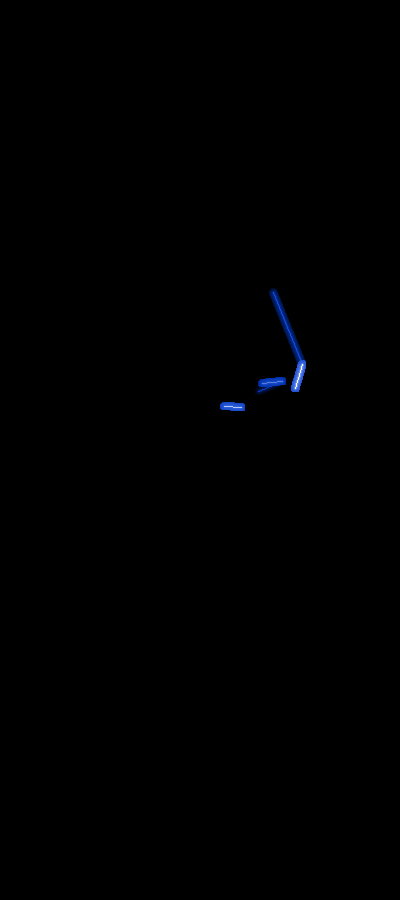

In [200]:
# add coords to paths

import numpy as np
import scipy 

paths = df_unique_trips.nlargest(6, ['Freq'])

paths = paths.iloc[:3000,:]

# generate empty pixel array, choose your resolution
image_data = np.zeros((900,400))

# generate pixel coordinates of starting points and end points
xys = [row_to_pixel(row, image_data.shape) for i, row in paths.iterrows()]

# draw the lines
# weigh the lines by actual trip counts
image_data = add_lines(image_data, xys, weights=[100000, 10000, 1000, 500, 10, 1], width = 1)
Image.fromarray(to_image(image_data*10)[:,:,:3],mode="RGB")

In [188]:
paths['Freq'].tolist()

[1217, 902, 810, 780, 739, 703]

In [191]:
def add_alpha(image_data):
    """
    Uses the Value in HSV as an alpha channel. 
    This creates an image that blends nicely with a black background.
    """
    
    # get hsv image
    hsv = rgb_to_hsv(image_data[:,:,:3].astype(float)/255)
    
    # create new image and set alpha channel
    new_image_data = np.zeros(image_data.shape)
    new_image_data[:,:,3] = hsv[:,:,2]
    
    # set value of hsv image to either 0 or 1.
    hsv[:,:,2] = np.where(hsv[:,:,2]>0, 1, 0)
    
    # combine alpha and new rgb
    new_image_data[:,:,:3] = hsv_to_rgb(hsv)
    return new_image_data

In [210]:
# WIP: Change from tonal legend to color or something else more readable, ideally on Stamen Toner.

# create empty map zoomed in on Chicago
CHICAGO_COORDS = (41.8781,-87.6298)
folium_map = folium.Map(location=CHICAGO_COORDS,
                        # tiles='Stamen Toner',
                        tiles="CartoDB dark_matter",
                        zoom_start=12)

for station in df_stations.iterrows():
    # most popular stations in blue
    if station[1].id in df_from_stations.nlargest(5, ['counts'])['from_station_id'].values:
        folium.CircleMarker(location=(station[1].latitude,
                                  station[1].longitude),
                        radius=10,
                        color='blue',
                        fill=True).add_to(folium_map)
    else: 
        continue
    
# create the overlay
map_overlay = add_alpha(to_image(image_data*10))

# compute extent of image in lat/lon
aspect_ratio = map_overlay.shape[1]/map_overlay.shape[0]
delta_lat = (max_lon-min_lon)/aspect_ratio*np.cos(min_lat/360*2*np.pi)

# add the image to the map
img = folium.raster_layers.ImageOverlay(map_overlay,
                           bounds = [(max_lat-delta_lat,min_lon),(max_lat,max_lon)],
                           opacity = 1,
                           name = "Paths")

img.add_to(folium_map)
folium.LayerControl().add_to(folium_map)

# show the map
folium_map

In [211]:
# WIP: Create layers based on Freq

CHICAGO_COORDS = (41.8781,-87.6298)
folium_map = folium.Map(location=CHICAGO_COORDS,
                        # tiles='Stamen Toner',
                        tiles="CartoDB dark_matter",
                        zoom_start=12)

for station in df_stations.iterrows():
    # most popular stations in blue
    if station[1].id in df_from_stations.nlargest(5, ['counts'])['from_station_id'].values:
        folium.CircleMarker(location=(station[1].latitude,
                                  station[1].longitude),
                        radius=10,
                        color='blue',
                        fill=True).add_to(folium_map)
    else: 
        continue

thresholds = [5,15,25]

for i,t in enumerate(thresholds):
    upper = thresholds[i+1] if i<len(thresholds)-1 else None
    image_data = get_image_data(paths, t, upper)
    name = "{} < Num. Trips < {}".format(t,"max" if upper is None else upper)

    map_overlay = add_alpha(to_image(image_data*10))
    delta_lat = (max_lon-min_lon)/map_overlay.shape[1]*map_overlay.shape[0]*np.cos(min_lat/360*2*np.pi)
    img = folium.raster_layers.ImageOverlay(map_overlay,
                               bounds = [(max_lat-delta_lat,min_lon),(max_lat,max_lon)],
                               name = name)

    img.add_to(folium_map)

lc = folium.LayerControl().add_to(folium_map)

folium_map

NameError: name 'get_image_data' is not defined

In [ ]:
# WIP: Map the top routes with openrouteservice
# From: https://openrouteservice.org/example-optimize-pub-crawl-with-ors/

!pip3 install openrouteservice ortools
!pip3 install shapely

In [ ]:
import folium
from shapely import wkt, geometry
import json
from pprint import pprint

from openrouteservice import directions
import os.path

In [ ]:
api_key = '5b3ce3597851110001cf62487ea9334bd5184ea383494a0ef9fabd97'
wkt_str = 'Polygon ((13.43926404 52.48961046, 13.42040115 52.49586382, 13.42541101 52.48808523, 13.42368155 52.48635829, 13.40788599 52.48886084, 13.40852944 52.487142, 13.40745989 52.48614988, 13.40439187 52.48499746, 13.40154731 52.48500125, 13.40038591 52.48373202, 13.39423818 52.4838664, 13.39425346 52.48577149, 13.38629096 52.48582648, 13.38626853 52.48486362, 13.3715694 52.48495055, 13.37402099 52.4851697, 13.37416365 52.48771105, 13.37353615 52.48798191, 13.37539925 52.489432, 13.37643416 52.49167597, 13.36821531 52.49333093, 13.36952826 52.49886974, 13.37360623 52.50416333, 13.37497726 52.50337776, 13.37764916 52.5079675, 13.37893813 52.50693045, 13.39923153 52.50807711, 13.40022883 52.50938108, 13.40443425 52.50777471, 13.4052848 52.50821063, 13.40802944 52.50618019, 13.40997081 52.50692569, 13.41152096 52.50489127, 13.41407284 52.50403794, 13.41490921 52.50491634, 13.41760145 52.50417013, 13.41943091 52.50564912, 13.4230412 52.50498109, 13.42720031 52.50566607, 13.42940229 52.50857222, 13.45335235 52.49752496, 13.45090795 52.49710803, 13.44765912 52.49472124, 13.44497623 52.49442276, 13.43926404 52.48961046))'

aoi_geom = wkt.loads(wkt_str) # load geometry from WKT string

aoi_coords = list(aoi_geom.exterior.coords) # get coords from exterior ring
aoi_coords = [(y,x) for x,y in aoi_coords] # swap (x,y) to (y,x). Really leaflet?!
aoi_centroid = aoi_geom.centroid # Kreuzberg center for map center

m = folium.Map(tiles='Stamen Toner',location=(aoi_centroid.y, aoi_centroid.x), zoom_start=14)
folium.vector_layers.Polygon(aoi_coords,
                                     color='#ffd699',
                                     fill_color='#ffd699',
                                    fill_opacity=0.2,
                                     weight=3).add_to(m)


def style_function(color):
    return lambda feature: dict(color=color,
                              weight=3,
                              opacity=1)

# See what a 'random' tour would have been
pubs_coords.append(pubs_coords[0])
request = {'coordinates': pubs_coords,
           'profile': 'bicycling',
           'geometry': 'true',
           'format_out': 'geojson',
#            'instructions': 'false'          
          }
random_route = clnt.directions(**request)

folium.features.GeoJson(data=random_route,
                        name='Random Bar Crawl',
                        style_function=style_function('#84e184'),
                       overlay=True).add_to(m)

# And now the optimal route
request['coordinates'] = optimal_coords
optimal_route = clnt.directions(**request)
folium.features.GeoJson(data=optimal_route,
                        name='Optimal Bar Crawl',
                        style_function=style_function('#6666ff'),
                       overlay=True).add_to(m)

m.add_child(folium.map.LayerControl())


WIP END

In [70]:
# There were 55,506 unique trips in 2017
df_unique_trips.shape

(55506, 3)

---
**Goal # 4: Find rider performance by Gender and Age based on avg trip distance (station to station), median speed (distance traveled / trip duration)**

Method Notes:
* Distances obtained from google distance matrix API


In [71]:
# Install datetime if needed
!pip3 install datetime

In [72]:
# Define a function to calculate age from birth year.
# (from https://www.geeksforgeeks.org/python-program-to-calculate-age-in-year/)
from datetime import date

def calculate_age (birthyear):
    today = date.today()
    age = today.year - birthyear
    return age

# Append age column to df
df['age'] = calculate_age(df.birthyear)

# Create bins for age groups with pandas cut function and append to df
# (from https://dfrieds.com/data-analysis/bin-values-python-pandas.html)
# Note default include_lowest is false
df['age_group'] = pd.cut(x=df['age'], bins=[17, 25, 35, 45, 55, 65, 70], labels=['17-25', '25-35', '35-45', '46-55', '55-65', '65-70'], include_lowest=True)
df

trip_id        start_time          end_time  bikeid  tripduration  \
0       17536701  12/31/2017 23:58     1/1/2018 0:03    3304           284   
1       17536700  12/31/2017 23:54     1/1/2018 0:18    5975          1402   
2       17536699  12/31/2017 23:54     1/1/2018 0:18    4906          1441   
3       17536698  12/31/2017 23:48  12/31/2017 23:53    5667           315   
4       17536697  12/31/2017 23:42  12/31/2017 23:47    5353           272   
...          ...               ...               ...     ...           ...   
669234  16734070    10/1/2017 0:01    10/1/2017 0:15    1099           837   
669235  16734069    10/1/2017 0:00    10/1/2017 0:07    3688           366   
669236  16734068    10/1/2017 0:00    10/1/2017 0:05    1416           264   
669237  16734067    10/1/2017 0:00    10/1/2017 0:06    5396           361   
669238  16734066    10/1/2017 0:00    10/1/2017 0:12    5802           741   

        from_station_id                    from_station_name  to_station_id  \
0                   159            Claremont Ave & Hirsch St             69   
1                   145  Mies van der Rohe Way & Chestnut St            145   
2                   145  Mies van der Rohe Way & Chestnut St            145   
3                   340            Clark St & Wrightwood Ave            143   
4                   240         Sheridan Rd & Irving Park Rd            245   
...                 ...                                  ...            ...   
669234              289                Wells St & Concord Ln            226   
669235               45         Michigan Ave & Congress Pkwy             52   
669236              520           Greenview Ave & Jarvis Ave            447   
669237              288           Larrabee St & Armitage Ave            289   
669238              135                 Halsted St & 21st St            129   

                            to_station_name    usertype  gender  birthyear  \
0                    Damen Ave & Pierce Ave  Subscriber    Male     1988.0   
1       Mies van der Rohe Way & Chestnut St    Customer     NaN        NaN   
2       Mies van der Rohe Way & Chestnut St    Customer     NaN        NaN   
3                 Sedgwick St & Webster Ave  Subscriber    Male     1963.0   
4                Clarendon Ave & Junior Ter  Subscriber    Male     1977.0   
...                                     ...         ...     ...        ...   
669234             Racine Ave & Belmont Ave  Subscriber    Male     1991.0   
669235               Michigan Ave & Lake St    Customer     NaN        NaN   
669236             Glenwood Ave & Morse Ave    Customer     NaN        NaN   
669237                Wells St & Concord Ln  Subscriber  Female     1984.0   
669238            Blue Island Ave & 18th St  Subscriber  Female     1994.0   

         from_lat  from_long     to_lat    to_long   age age_group  
0       41.907781 -87.685854  41.909396 -87.677692  32.0     25-35  
1       41.898587 -87.621915  41.898587 -87.621915   NaN       NaN  
2       41.898587 -87.621915  41.898587 -87.621915   NaN       NaN  
3       41.929546 -87.643118  41.922167 -87.638888  57.0     55-65  
4       41.954245 -87.654406  41.961004 -87.649603  43.0     35-45  
...           ...        ...        ...        ...   ...       ...  
669234  41.912133 -87.634656  41.939743 -87.658865  29.0     25-35  
669235  41.876243 -87.624426  41.886024 -87.624117   NaN       NaN  
669236  42.015962 -87.668570  42.007972 -87.665502   NaN       NaN  
669237  41.918084 -87.643749  41.912133 -87.634656  36.0     35-45  
669238  41.853780 -87.646650  41.857556 -87.661535  26.0     25-35  

[669239 rows x 18 columns]

In [73]:
df_stations

id                            name      city   latitude  longitude  \
0      2             Buckingham Fountain   Chicago  41.876393 -87.620328   
1      3                  Shedd Aquarium   Chicago  41.867226 -87.615355   
2      4                  Burnham Harbor   Chicago  41.856268 -87.613348   
3      5          State St & Harrison St   Chicago  41.874053 -87.627716   
4      6                  Dusable Harbor   Chicago  41.885041 -87.612794   
..   ...                             ...       ...        ...        ...   
580  622      California Ave & Cortez St   Chicago  41.900363 -87.696704   
581  623           Michigan Ave & 8th St   Chicago  41.872773 -87.623981   
582  624  Dearborn St & Van Buren St (*)   Chicago  41.876268 -87.629155   
583  625       Chicago Ave & Dempster St  Evanston  42.041691 -87.680687   
584  626        Delano Ct & Roosevelt Rd   Chicago  41.867491 -87.632190   

     dpcapacity       online_date  Unnamed: 7  
0            27   6/10/2013 10:43         NaN  
1            55   6/10/2013 10:44         NaN  
2            23   6/10/2013 10:46         NaN  
3            23   6/10/2013 10:46         NaN  
4            39   6/10/2013 11:18         NaN  
..          ...               ...         ...  
580          15    4/27/2017 9:17         NaN  
581          31   6/13/2017 15:23         NaN  
582          16   7/26/2017 21:25         NaN  
583          15   8/11/2017 16:53         NaN  
584          19  12/21/2017 22:06         NaN  

[585 rows x 8 columns]

In [214]:
# First create a dictionary of station coordinates to map onto the existing list of unique trip start and endpoints

# concatenate the coords
df_stations['coords'] = list(zip(df_stations.latitude,df_stations.longitude))

# select only the id and coords to turn into dictionary
stations_dict = df_stations[['id', 'coords']].set_index('id').to_dict()
stations_dict

{'coords': {2: (41.876393, -87.620328),
  3: (41.86722596, -87.61535539),
  4: (41.856268, -87.613348),
  5: (41.874053, -87.627716),
  6: (41.885041, -87.612794),
  7: (41.88634906, -87.61751655),
  9: (41.82879202, -87.68060446),
  11: (41.76663824, -87.57645011),
  12: (41.76640946, -87.56568757),
  13: (41.932418, -87.65270500000003),
  14: (41.858086, -87.651073),
  15: (41.858166, -87.65649499999998),
  16: (41.910337, -87.67007199999998),
  17: (41.903119, -87.673935),
  18: (41.883132, -87.637321),
  19: (41.869417, -87.660996),
  20: (41.910522, -87.65310600000002),
  21: (41.87772613, -87.65478743),
  22: (41.8694821, -87.6554864),
  23: (41.902924, -87.637715),
  24: (41.89186, -87.62062),
  25: (41.89766, -87.62351),
  26: (41.890359, -87.617532),
  27: (41.91021, -87.6435),
  28: (41.91468, -87.64331999999997),
  29: (41.90068, -87.6626),
  30: (41.899643, -87.6677),
  31: (41.896776, -87.635633),
  32: (41.87464, -87.65703),
  33: (41.877181, -87.627844),
  34: (41.926755

In [215]:
# Create unique_trips df containing the routes that need distance data from APIs
unique_trips = df.groupby(['from_station_id','from_station_name', 'to_station_id', 'to_station_name']).size().reset_index(name='Freq')

# Map concatenated long and lat of from_station_name to new column
# Turn df_stations into a dictionary with key station id
unique_trips['Origin'] = unique_trips['from_station_id'].map(stations_dict['coords'])
unique_trips['Destination'] = unique_trips['to_station_id'].map(stations_dict['coords'])
unique_trips.drop(['Freq'], axis=1, inplace=True)

unique_trips

from_station_id         from_station_name  to_station_id  \
0                    2       Buckingham Fountain              2   
1                    2       Buckingham Fountain              3   
2                    2       Buckingham Fountain              4   
3                    2       Buckingham Fountain              5   
4                    2       Buckingham Fountain              6   
...                ...                       ...            ...   
55501              626  Delano Ct & Roosevelt Rd            181   
55502              626  Delano Ct & Roosevelt Rd            273   
55503              626  Delano Ct & Roosevelt Rd            282   
55504              626  Delano Ct & Roosevelt Rd            321   
55505              626  Delano Ct & Roosevelt Rd            338   

                to_station_name                           Origin  \
0           Buckingham Fountain          (41.876393, -87.620328)   
1                Shedd Aquarium          (41.876393, -87.620328)   
2                Burnham Harbor          (41.876393, -87.620328)   
3        State St & Harrison St          (41.876393, -87.620328)   
4                Dusable Harbor          (41.876393, -87.620328)   
...                         ...                              ...   
55501  LaSalle St & Illinois St  (41.867491, -87.63219000000002)   
55502    Michigan Ave & 18th St  (41.867491, -87.63219000000002)   
55503   Halsted St & Maxwell St  (41.867491, -87.63219000000002)   
55504       Wabash Ave & 9th St  (41.867491, -87.63219000000002)   
55505     Calumet Ave & 18th St  (41.867491, -87.63219000000002)   

                       Destination  
0          (41.876393, -87.620328)  
1      (41.86722596, -87.61535539)  
2          (41.856268, -87.613348)  
3          (41.874053, -87.627716)  
4          (41.885041, -87.612794)  
...                            ...  
55501      (41.890762, -87.631697)  
55502       (41.857813, -87.62455)  
55503      (41.864883, -87.647071)  
55504      (41.870769, -87.625734)  
55505      (41.857611, -87.619407)  

[55506 rows x 6 columns]

In [216]:
import numpy as np

# API calls are limited so we need to remove redundant trips from unique_trips

# Remove all trips where origin and destination are the same
# This reduces routes from 55,506 to 54,982
drop_indexes = unique_trips[(unique_trips['from_station_id'] == unique_trips['to_station_id'])].index

unique_trips.drop(drop_indexes , inplace=True)
unique_trips

from_station_id         from_station_name  to_station_id  \
1                    2       Buckingham Fountain              3   
2                    2       Buckingham Fountain              4   
3                    2       Buckingham Fountain              5   
4                    2       Buckingham Fountain              6   
5                    2       Buckingham Fountain              7   
...                ...                       ...            ...   
55501              626  Delano Ct & Roosevelt Rd            181   
55502              626  Delano Ct & Roosevelt Rd            273   
55503              626  Delano Ct & Roosevelt Rd            282   
55504              626  Delano Ct & Roosevelt Rd            321   
55505              626  Delano Ct & Roosevelt Rd            338   

                   to_station_name                           Origin  \
1                   Shedd Aquarium          (41.876393, -87.620328)   
2                   Burnham Harbor          (41.876393, -87.620328)   
3           State St & Harrison St          (41.876393, -87.620328)   
4                   Dusable Harbor          (41.876393, -87.620328)   
5      Field Blvd & South Water St          (41.876393, -87.620328)   
...                            ...                              ...   
55501     LaSalle St & Illinois St  (41.867491, -87.63219000000002)   
55502       Michigan Ave & 18th St  (41.867491, -87.63219000000002)   
55503      Halsted St & Maxwell St  (41.867491, -87.63219000000002)   
55504          Wabash Ave & 9th St  (41.867491, -87.63219000000002)   
55505        Calumet Ave & 18th St  (41.867491, -87.63219000000002)   

                       Destination  
1      (41.86722596, -87.61535539)  
2          (41.856268, -87.613348)  
3          (41.874053, -87.627716)  
4          (41.885041, -87.612794)  
5      (41.88634906, -87.61751655)  
...                            ...  
55501      (41.890762, -87.631697)  
55502       (41.857813, -87.62455)  
55503      (41.864883, -87.647071)  
55504      (41.870769, -87.625734)  
55505      (41.857611, -87.619407)  

[54982 rows x 6 columns]

In [217]:
# Remove one trip in pairs when the origin and destination are flipped; we can assume trips are the same distance regardless of direction
# This reduces routes from 54,982 to 33,978
unique_trips = unique_trips[~unique_trips[['from_station_id', 'to_station_id']].apply(frozenset, axis=1).duplicated()]
unique_trips

from_station_id         from_station_name  to_station_id  \
1                    2       Buckingham Fountain              3   
2                    2       Buckingham Fountain              4   
3                    2       Buckingham Fountain              5   
4                    2       Buckingham Fountain              6   
5                    2       Buckingham Fountain              7   
...                ...                       ...            ...   
55498              626  Delano Ct & Roosevelt Rd            169   
55499              626  Delano Ct & Roosevelt Rd            171   
55500              626  Delano Ct & Roosevelt Rd            172   
55502              626  Delano Ct & Roosevelt Rd            273   
55503              626  Delano Ct & Roosevelt Rd            282   

                   to_station_name                           Origin  \
1                   Shedd Aquarium          (41.876393, -87.620328)   
2                   Burnham Harbor          (41.876393, -87.620328)   
3           State St & Harrison St          (41.876393, -87.620328)   
4                   Dusable Harbor          (41.876393, -87.620328)   
5      Field Blvd & South Water St          (41.876393, -87.620328)   
...                            ...                              ...   
55498       Canal St & Harrison St  (41.867491, -87.63219000000002)   
55499        May St & Cullerton St  (41.867491, -87.63219000000002)   
55500           Rush St & Cedar St  (41.867491, -87.63219000000002)   
55502       Michigan Ave & 18th St  (41.867491, -87.63219000000002)   
55503      Halsted St & Maxwell St  (41.867491, -87.63219000000002)   

                              Destination  
1             (41.86722596, -87.61535539)  
2                 (41.856268, -87.613348)  
3                 (41.874053, -87.627716)  
4                 (41.885041, -87.612794)  
5             (41.88634906, -87.61751655)  
...                                   ...  
55498             (41.874255, -87.639573)  
55499             (41.855136, -87.654127)  
55500  (41.902308700000006, -87.62769053)  
55502              (41.857813, -87.62455)  
55503             (41.864883, -87.647071)  

[33978 rows x 6 columns]

In [218]:
# Review data to make sure it looks right
unique_trips.describe()

from_station_id  to_station_id
count     33978.000000   33978.000000
mean        177.791277     261.426099
std         141.133503     143.780842
min           2.000000       2.000000
25%          60.000000     150.000000
50%         142.000000     255.000000
75%         258.000000     341.000000
max         626.000000     626.000000

In [219]:
# Create a smaller list of 10 random routes from unique_trips to test API function.
test = unique_trips.sample(n=10, random_state=1)
test

from_station_id                from_station_name  to_station_id  \
45367              339            Emerald Ave & 31st St            403   
51286              471       Francisco Ave & Foster Ave            475   
4736                36       Franklin St & Jackson Blvd            132   
9764                62                  McCormick Place            402   
17872              118          Sedgwick St & North Ave            305   
31051              217  Racine Ave (May St) & Fulton St            233   
11833               77          Clinton St & Madison St            216   
40075              299           Halsted St & Roscoe St            163   
40270              300             Broadway & Barry Ave            202   
6400                45     Michigan Ave & Congress Pkwy             94   

                         to_station_name                           Origin  \
45367            Wentworth Ave & 33rd St          (41.838198, -87.645143)   
51286       Washtenaw Ave & Lawrence Ave      (41.97563273, -87.70141944)   
4736             Wentworth Ave & 24th St      (41.87770796, -87.63532114)   
9764               Shields Ave & 31st St      (41.85137517, -87.61883465)   
17872          Western Ave & Division St          (41.911386, -87.638677)   
31051  Sangamon St & Washington Blvd (*)  (41.886926, -87.65691899999999)   
11833       California Ave & Division St  (41.882242, -87.64106600000002)   
40075           Damen Ave & Clybourn Ave            (41.94367, -87.64895)   
40270               Halsted St & 18th St          (41.937725, -87.644095)   
6400             Clark St & Armitage Ave          (41.876243, -87.624426)   

                           Destination  
45367      (41.83452989, -87.63182298)  
51286          (41.968987, -87.696027)  
4736           (41.849237, -87.631715)  
9764           (41.838464, -87.635406)  
17872          (41.902893, -87.687275)  
31051  (41.883004, -87.65114799999998)  
11833          (41.903029, -87.697474)  
40075          (41.931931, -87.677856)  
40270          (41.857499, -87.646277)  
6400           (41.918306, -87.636282)

Below is the google maps method of obtaining route distances, using google's distance matrix API. 

Documentation here: https://developers.google.com/maps/documentation/distance-matrix/start

Based on this guide: https://medium.com/how-to-use-google-distance-matrix-api-in-python/how-to-use-google-distance-matrix-api-in-python-ef9cd895303c

If you do not want to run the google maps API, skip to importing unique_trips which contains data from a previous API call.

In [ ]:
# Install the google maps services python package
!pip3 install -U googlemaps

In [ ]:
import pandas as pd
import googlemaps
from itertools import tee

API_key = '' # Get your API key here: https://developers.google.com/maps/documentation/javascript/get-api-key
gmaps = googlemaps.Client(key=API_key)

def google_distance(df):
    
    #empty list - will be used to store calculated distances
    list = []

    # Loop through each row in the data frame, skipping the first header row
    for i1, row1 in df.iterrows():
          #Assign latitude and longitude as origin/departure points
          origins = (row1['Origin'])

          #Assign latitude and longitude from the next row as the destination point
          destination = (row1['Destination'])

          #pass origin and destination variables to distance_matrix function, output is always in meters so multiply by 0.00062137 to convert to miles
          result = (gmaps.distance_matrix(origins, destination, mode='bicycling')["rows"][0]["elements"][0]["distance"]["value"]) * 0.00062137

          #append result to list
          list.append(result)
    
    #Add column 'Distance' to data frame and assign to list values
    df['Distance'] = list
    
    return list
  
distances = google_distance(test)
distances

In [ ]:
test

In [ ]:
# Once it works on test case of 10 records, we can call for all 33,000+ records 
all_distances = google_distance(unique_trips)

In [ ]:
# It's important to download and save this API distance data. 
unique_trips.to_csv(r'/Users/Ailin@ibm.com/Box/Ailin Cao - New Capstone Project/Unique_Trips_Distances.csv', index = False)

In [220]:
# If you do not want to run the API, you can import the data that has been created from the above function here
unique_trips = pd.read_csv (r'/Users/Ailin@ibm.com/Box/Ailin Cao - New Capstone Project/Unique_Trips_Distances.csv')

In [221]:
unique_trips

from_station_id         from_station_name  to_station_id  \
0                    2       Buckingham Fountain              3   
1                    2       Buckingham Fountain              4   
2                    2       Buckingham Fountain              5   
3                    2       Buckingham Fountain              6   
4                    2       Buckingham Fountain              7   
...                ...                       ...            ...   
33973              626  Delano Ct & Roosevelt Rd            169   
33974              626  Delano Ct & Roosevelt Rd            171   
33975              626  Delano Ct & Roosevelt Rd            172   
33976              626  Delano Ct & Roosevelt Rd            273   
33977              626  Delano Ct & Roosevelt Rd            282   

                   to_station_name                           Origin  \
0                   Shedd Aquarium          (41.876393, -87.620328)   
1                   Burnham Harbor          (41.876393, -87.620328)   
2           State St & Harrison St          (41.876393, -87.620328)   
3                   Dusable Harbor          (41.876393, -87.620328)   
4      Field Blvd & South Water St          (41.876393, -87.620328)   
...                            ...                              ...   
33973       Canal St & Harrison St  (41.867491, -87.63219000000002)   
33974        May St & Cullerton St  (41.867491, -87.63219000000002)   
33975           Rush St & Cedar St  (41.867491, -87.63219000000002)   
33976       Michigan Ave & 18th St  (41.867491, -87.63219000000002)   
33977      Halsted St & Maxwell St  (41.867491, -87.63219000000002)   

                              Destination  Distance  
0             (41.86722596, -87.61535539)  0.854384  
1                 (41.856268, -87.613348)  2.041822  
2                 (41.874053, -87.627716)  0.697799  
3                 (41.885041, -87.612794)  0.887938  
4             (41.88634906, -87.61751655)  1.431636  
...                                   ...       ...  
33973             (41.874255, -87.639573)  0.842578  
33974             (41.855136, -87.654127)  1.966636  
33975  (41.902308700000006, -87.62769053)  2.759504  
33976              (41.857813, -87.62455)  1.098582  
33977             (41.864883, -87.647071)  0.937026  

[33978 rows x 7 columns]

In [222]:
unique_trips.shape

(33978, 7)

In [223]:
unique_trips.describe()

from_station_id  to_station_id      Distance
count     33978.000000   33978.000000  33978.000000
mean        177.791277     261.426099      2.659347
std         141.133503     143.780842      1.494569
min           2.000000       2.000000      0.078914
25%          60.000000     150.000000      1.571445
50%         142.000000     255.000000      2.463732
75%         258.000000     341.000000      3.513692
max         626.000000     626.000000     16.324011

End of the google maps API method. 

See notes at the end for alternative APIs.


In [224]:
# Map distance data from unique_trips_csv into df
def map_distances(trip_df, distance_df):

    # Create frozensets of from_station_id and to_station_id to use as keys 
    trip_df['keys'] = list(map(frozenset, zip(trip_df.from_station_id, trip_df.to_station_id)))
    distance_df['keys'] = list(map(frozenset, zip(distance_df.from_station_id, distance_df.to_station_id)))

    # Convert distance_df into a dictionary
    distance_dict = distance_df.loc[:, ['keys', 'Distance']].set_index('keys').to_dict()
    
    # Map distances to trip_df, filling 0 where not found
    trip_df['Distance'] = trip_df['keys'].map(distance_dict['Distance']).fillna(0)
    
    return distance_dict


In [225]:
# Create a random test dataframe
trip_test = df.sample(n=20, random_state=1)

# Test map_distances
results = map_distances(trip_test, unique_trips)

results

{'Distance': {frozenset({2, 3}): 0.85438375,
  frozenset({2, 4}): 2.04182182,
  frozenset({2, 5}): 0.69779851,
  frozenset({2, 6}): 0.88793773,
  frozenset({2, 7}): 1.43163648,
  frozenset({2, 24}): 1.15326272,
  frozenset({2, 25}): 1.7460497,
  frozenset({2, 26}): 1.25143918,
  frozenset({2, 33}): 0.75247907,
  frozenset({2, 35}): 1.72802997,
  frozenset({2, 36}): 1.2924496,
  frozenset({2, 37}): 0.69904125,
  frozenset({2, 38}): 1.43660744,
  frozenset({2, 39}): 0.48777545,
  frozenset({2, 40}): 0.81523744,
  frozenset({2, 43}): 0.87799581,
  frozenset({2, 44}): 1.00910488,
  frozenset({2, 45}): 0.7270029,
  frozenset({2, 47}): 1.3297318,
  frozenset({2, 49}): 0.96125939,
  frozenset({2, 50}): 0.58346643,
  frozenset({2, 51}): 1.19800136,
  frozenset({2, 52}): 1.01159036,
  frozenset({2, 59}): 0.90285061,
  frozenset({2, 62}): 2.07040484,
  frozenset({2, 68}): 1.48010334,
  frozenset({2, 72}): 1.37571318,
  frozenset({2, 75}): 2.2617868,
  frozenset({2, 76}): 0.47410531,
  frozenset(

In [226]:
# Once it works, implement map_distance on entire dataset
distance_dict_test = map_distances(df, unique_trips)

df.head()

trip_id        start_time          end_time  bikeid  tripduration  \
0  17536701  12/31/2017 23:58     1/1/2018 0:03    3304           284   
1  17536700  12/31/2017 23:54     1/1/2018 0:18    5975          1402   
2  17536699  12/31/2017 23:54     1/1/2018 0:18    4906          1441   
3  17536698  12/31/2017 23:48  12/31/2017 23:53    5667           315   
4  17536697  12/31/2017 23:42  12/31/2017 23:47    5353           272   

   from_station_id                    from_station_name  to_station_id  \
0              159            Claremont Ave & Hirsch St             69   
1              145  Mies van der Rohe Way & Chestnut St            145   
2              145  Mies van der Rohe Way & Chestnut St            145   
3              340            Clark St & Wrightwood Ave            143   
4              240         Sheridan Rd & Irving Park Rd            245   

                       to_station_name    usertype gender  birthyear  \
0               Damen Ave & Pierce Ave  Subscriber   Male     1988.0   
1  Mies van der Rohe Way & Chestnut St    Customer    NaN        NaN   
2  Mies van der Rohe Way & Chestnut St    Customer    NaN        NaN   
3            Sedgwick St & Webster Ave  Subscriber   Male     1963.0   
4           Clarendon Ave & Junior Ter  Subscriber   Male     1977.0   

    from_lat  from_long     to_lat    to_long   age age_group        keys  \
0  41.907781 -87.685854  41.909396 -87.677692  32.0     25-35   (69, 159)   
1  41.898587 -87.621915  41.898587 -87.621915   NaN       NaN       (145)   
2  41.898587 -87.621915  41.898587 -87.621915   NaN       NaN       (145)   
3  41.929546 -87.643118  41.922167 -87.638888  57.0     55-65  (340, 143)   
4  41.954245 -87.654406  41.961004 -87.649603  43.0     35-45  (240, 245)   

   Distance  
0  0.653060  
1  0.000000  
2  0.000000  
3  0.580360  
4  0.719546

In [227]:
# Define speed for trip distance
def speed(tripdistance, tripduration):
    # Speed is in miles / hour
    return tripdistance / ( tripduration / (60 * 60) ) # Convert tripduration from seconds to hours

# Append speed column to df
df['speed'] = speed(df.Distance, df.tripduration)

In [228]:
# Shows there are at maximum 81,784 null values (in age_group)...which is weird, because age is only missing 78,827
df.isnull().sum()

trip_id                  0
start_time               0
end_time                 0
bikeid                   0
tripduration             0
from_station_id          0
from_station_name        0
to_station_id            0
to_station_name          0
usertype                 0
gender               78580
birthyear            78827
from_lat                 0
from_long                0
to_lat                   0
to_long                  0
age                  78827
age_group            81784
keys                     0
Distance                 0
speed                    0
dtype: int64

In [229]:
# We hypothesize this is because they fall outside the range of 17 - 70
# We see that this is true. 2,957 rows fall outside of the range 17 to 70. 
df['age'][(df.age < 17) | (df.age > 70)].count()

# We can drop by age_group for this goal.

2957

In [313]:
# Remove NaNs from age_group, gender
# This reduces data from 669,239 to 587,381, which is accurate
df_clean = df.dropna(axis='rows', subset=['age_group', 'gender'])
df_clean

# Remove 0s from distance
df_clean = df_clean.drop(df_clean[df_clean.Distance == 0].index)

# Check for 0s -- all gone
(df_clean == 0).sum(axis = 0)

trip_id              0
start_time           0
end_time             0
bikeid               0
tripduration         0
from_station_id      0
from_station_name    0
to_station_id        0
to_station_name      0
usertype             0
gender               0
birthyear            0
from_lat             0
from_long            0
to_lat               0
to_long              0
age                  0
age_group            0
keys                 0
Distance             0
speed                0
dtype: int64

In [314]:
# Create a table for gender and age breakdown
df_gender_age = df_clean.groupby(['gender', 'age_group'])['speed'].median().to_frame()

# Calculate average trip distance
avg_distance = df_clean.groupby(['gender', 'age_group'])['Distance'].mean()

# Append calculated to df_usertypes
df_gender_age['Avg. Trip Distance (miles)'] = avg_distance

df_gender_age

speed  Avg. Trip Distance (miles)
gender age_group                                      
Female 17-25      7.932469                    1.325065
       25-35      8.138784                    1.509410
       35-45      8.107103                    1.520516
       46-55      7.680681                    1.488973
       55-65      7.194457                    1.359484
       65-70      7.040449                    1.531567
Male   17-25      8.506041                    1.078931
       25-35      8.883816                    1.420446
       35-45      8.774769                    1.509608
       46-55      8.585320                    1.433260
       55-65      8.020220                    1.357849
       65-70      7.521427                    1.193790

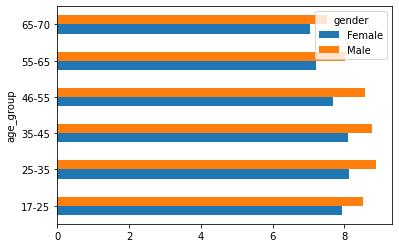

In [315]:
df_gender_age['speed'].unstack(0).plot.barh()

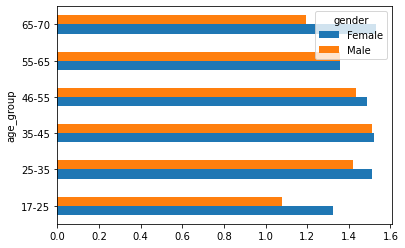

In [316]:
df_gender_age['Avg. Trip Distance (miles)'].unstack(0).plot.barh()

---
**Goal # 5: What is the busiest bike in Chicago in 2017? How many times was it used? How many minutes was it in use?**

In [317]:
# Shows there are 6,972 rows with distance 0
(df == 0).sum(axis = 0)

trip_id                  0
start_time               0
end_time                 0
bikeid                   0
tripduration             0
from_station_id          0
from_station_name        0
to_station_id            0
to_station_name          0
usertype                 0
gender                   0
birthyear                0
from_lat                 0
from_long                0
to_lat                   0
to_long                  0
age                      0
age_group                0
keys                     0
Distance             13235
speed                13235
dtype: int64

In [318]:
# We drop rows with Distance = 0 because this is based on start and end stations being the same; could be a round trip of indeterminate distance
# We do not use df_clean because in this case data missing gender and age are still valid, and this only impacts one question
# Create a dataframe of bikeid
df_busiest_bikes = df.drop(df[df.Distance == 0].index).groupby(['bikeid']).size().reset_index(name='counts')

# Set index to from_station_name
df_busiest_bikes.set_index('bikeid', inplace=True)

# Calculate total tripduration in minutes
total_tripduration = (df.groupby(['bikeid'])['tripduration'].sum()) / 60

# Append calculated to df_usertypes
df_busiest_bikes['Trip Duration (Minutes)'] = total_tripduration

# Find the top 5 busiest bikes by counts (number of trips)
df_busiest_bikes.nlargest(5, ['counts'])

counts  Trip Duration (Minutes)
bikeid                                 
6405       451              5191.033333
5985       422              5135.500000
6135       421              5334.500000
6326       419              4893.083333
6379       411              5197.033333

In [319]:
df

trip_id          start_time            end_time  bikeid  \
0       17536701 2017-12-31 23:58:00 2018-01-01 00:03:00    3304   
1       17536700 2017-12-31 23:54:00 2018-01-01 00:18:00    5975   
2       17536699 2017-12-31 23:54:00 2018-01-01 00:18:00    4906   
3       17536698 2017-12-31 23:48:00 2017-12-31 23:53:00    5667   
4       17536697 2017-12-31 23:42:00 2017-12-31 23:47:00    5353   
...          ...                 ...                 ...     ...   
669234  16734070 2017-10-01 00:01:00 2017-10-01 00:15:00    1099   
669235  16734069 2017-10-01 00:00:00 2017-10-01 00:07:00    3688   
669236  16734068 2017-10-01 00:00:00 2017-10-01 00:05:00    1416   
669237  16734067 2017-10-01 00:00:00 2017-10-01 00:06:00    5396   
669238  16734066 2017-10-01 00:00:00 2017-10-01 00:12:00    5802   

        tripduration  from_station_id                    from_station_name  \
0                284              159            Claremont Ave & Hirsch St   
1               1402              145  Mies van der Rohe Way & Chestnut St   
2               1441              145  Mies van der Rohe Way & Chestnut St   
3                315              340            Clark St & Wrightwood Ave   
4                272              240         Sheridan Rd & Irving Park Rd   
...              ...              ...                                  ...   
669234           837              289                Wells St & Concord Ln   
669235           366               45         Michigan Ave & Congress Pkwy   
669236           264              520           Greenview Ave & Jarvis Ave   
669237           361              288           Larrabee St & Armitage Ave   
669238           741              135                 Halsted St & 21st St   

        to_station_id                      to_station_name    usertype  ...  \
0                  69               Damen Ave & Pierce Ave  Subscriber  ...   
1                 145  Mies van der Rohe Way & Chestnut St    Customer  ...   
2                 145  Mies van der Rohe Way & Chestnut St    Customer  ...   
3                 143            Sedgwick St & Webster Ave  Subscriber  ...   
4                 245           Clarendon Ave & Junior Ter  Subscriber  ...   
...               ...                                  ...         ...  ...   
669234            226             Racine Ave & Belmont Ave  Subscriber  ...   
669235             52               Michigan Ave & Lake St    Customer  ...   
669236            447             Glenwood Ave & Morse Ave    Customer  ...   
669237            289                Wells St & Concord Ln  Subscriber  ...   
669238            129            Blue Island Ave & 18th St  Subscriber  ...   

       birthyear   from_lat  from_long     to_lat    to_long   age  age_group  \
0         1988.0  41.907781 -87.685854  41.909396 -87.677692  32.0      25-35   
1            NaN  41.898587 -87.621915  41.898587 -87.621915   NaN        NaN   
2            NaN  41.898587 -87.621915  41.898587 -87.621915   NaN        NaN   
3         1963.0  41.929546 -87.643118  41.922167 -87.638888  57.0      55-65   
4         1977.0  41.954245 -87.654406  41.961004 -87.649603  43.0      35-45   
...          ...        ...        ...        ...        ...   ...        ...   
669234    1991.0  41.912133 -87.634656  41.939743 -87.658865  29.0      25-35   
669235       NaN  41.876243 -87.624426  41.886024 -87.624117   NaN        NaN   
669236       NaN  42.015962 -87.668570  42.007972 -87.665502   NaN        NaN   
669237    1984.0  41.918084 -87.643749  41.912133 -87.634656  36.0      35-45   
669238    1994.0  41.853780 -87.646650  41.857556 -87.661535  26.0      25-35   

              keys  Distance      speed  
0        (69, 159)  0.653060   8.278224  
1            (145)  0.000000   0.000000  
2            (145)  0.000000   0.000000  
3       (340, 143)  0.580360   6.632681  
4       (240, 245)  0.719546   9.523409  
...            ...       ...        ...  
669234  (289, 226)  2.428935  10.447034

In [320]:
df.describe(include='all')

trip_id           start_time             end_time         bikeid  \
count   6.692390e+05               669239               669239  669239.000000   
unique           NaN                96140                96146            NaN   
top              NaN  2017-10-09 17:16:00  2017-10-19 17:39:00            NaN   
freq             NaN                   66                   58            NaN   
first            NaN  2017-10-01 00:00:00  2017-10-01 00:05:00            NaN   
last             NaN  2017-12-31 23:58:00  2018-01-01 00:18:00            NaN   
mean    1.713252e+07                  NaN                  NaN    3717.000296   
std     2.312134e+05                  NaN                  NaN    1978.768602   
min     1.673407e+07                  NaN                  NaN       1.000000   
25%     1.693282e+07                  NaN                  NaN    1966.000000   
50%     1.713069e+07                  NaN                  NaN    3905.000000   
75%     1.733437e+07                  NaN                  NaN    5590.000000   
max     1.753670e+07                  NaN                  NaN    6471.000000   

         tripduration  from_station_id    from_station_name  to_station_id  \
count   669239.000000    669239.000000               669239   669239.00000   
unique            NaN              NaN                  567            NaN   
top               NaN              NaN  Canal St & Adams St            NaN   
freq              NaN              NaN                12575            NaN   
first             NaN              NaN                  NaN            NaN   
last              NaN              NaN                  NaN            NaN   
mean       779.440499       183.954205                  NaN      183.26719   
std       1307.234185       133.798698                  NaN      133.94308   
min         60.000000         2.000000                  NaN        2.00000   
25%        347.000000        76.000000                  NaN       76.00000   
50%        567.000000       161.000000                  NaN      157.00000   
75%        940.000000       280.000000                  NaN      275.00000   
max      85466.000000       626.000000                  NaN      626.00000   

            to_station_name    usertype  ...      birthyear       from_lat  \
count                669239      669239  ...  590412.000000  669239.000000   
unique                  567           2  ...            NaN            NaN   
top     Canal St & Adams St  Subscriber  ...            NaN            NaN   
freq                  14554      591152  ...            NaN            NaN   
first                   NaN         NaN  ...            NaN            NaN   
last                    NaN         NaN  ...            NaN            NaN   
mean                    NaN         NaN  ...    1981.518929      41.897748   
std                     NaN         NaN  ...      11.018552       0.037580   
min                     NaN         NaN  ...    1918.000000      41.736646   
25%                     NaN         NaN  ...    1975.000000      41.880317   
50%                     NaN         NaN  ...    1985.000000      41.890573   
75%                     NaN         NaN  ...    1990.000000      41.915689   
max                     NaN         NaN  ...    2004.000000      42.064313   

            from_long         to_lat        to_long            age  age_group  \
count   669239.000000  669239.000000  669239.000000  590412.000000     587455   
unique            NaN            NaN            NaN            NaN          6   
top               NaN            NaN            NaN            NaN      25-35   
freq              NaN            NaN            NaN            NaN     277012   
first             NaN            NaN            NaN            NaN        NaN   
last              NaN            NaN            NaN            NaN        NaN   
mean       -87.642790      41.898115     -87.642936      38.481071        NaN   
std          0.022155       0.037749       0

In [321]:
# Find the top 5 busiest bikes by tripduration 
df_busiest_bikes.nlargest(5, ['Trip Duration (Minutes)'])

counts  Trip Duration (Minutes)
bikeid                                 
6119       359              6051.916667
5978       352              5592.983333
6317       377              5484.816667
6315       334              5424.683333
6469       354              5385.466667

In [322]:
# WIP Visualize the busiest bike...

---

WIP 

**Goal # 6: The Mayor would like Divvy Bike to add a new feature to their kiosks: “Enter a destination and we’ll tell you how long the trip will take”.**

We need you to build a model that can predict how long a trip will take given a starting point and destination. You will need to get creative about the factors that will predict travel time. (Optional: find and use additional datasets that may have an impact on travel time, like weather and traffic).

Reference: https://www.kaggle.com/nitin194/nyc-taxi-trip-duration-prediction

In [323]:
# Import required modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from haversine import haversine
import statsmodels.formula.api as sm
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import warnings; warnings.simplefilter('ignore')

trip_id          start_time            end_time  bikeid  \
0       17536701 2017-12-31 23:58:00 2018-01-01 00:03:00    3304   
3       17536698 2017-12-31 23:48:00 2017-12-31 23:53:00    5667   
4       17536697 2017-12-31 23:42:00 2017-12-31 23:47:00    5353   
5       17536696 2017-12-31 23:41:00 2017-12-31 23:51:00    5840   
6       17536695 2017-12-31 23:34:00 2017-12-31 23:39:00    6351   
...          ...                 ...                 ...     ...   
669232  16734072 2017-10-01 00:01:00 2017-10-01 00:12:00    3866   
669233  16734071 2017-10-01 00:01:00 2017-10-01 00:12:00      88   
669234  16734070 2017-10-01 00:01:00 2017-10-01 00:15:00    1099   
669237  16734067 2017-10-01 00:00:00 2017-10-01 00:06:00    5396   
669238  16734066 2017-10-01 00:00:00 2017-10-01 00:12:00    5802   

        tripduration  from_station_id             from_station_name  \
0                284              159     Claremont Ave & Hirsch St   
3                315              340     Clark St & Wrightwood Ave   
4                272              240  Sheridan Rd & Irving Park Rd   
5                589               93     Sheffield Ave & Willow St   
6                301              337        Clark St & Chicago Ave   
...              ...              ...                           ...   
669232           664              220    Hampden Ct & Diversey Pkwy   
669233           662              220    Hampden Ct & Diversey Pkwy   
669234           837              289         Wells St & Concord Ln   
669237           361              288    Larrabee St & Armitage Ave   
669238           741              135          Halsted St & 21st St   

        to_station_id              to_station_name    usertype  ... birthyear  \
0                  69       Damen Ave & Pierce Ave  Subscriber  ...    1988.0   
3                 143    Sedgwick St & Webster Ave  Subscriber  ...    1963.0   
4                 245   Clarendon Ave & Junior Ter  Subscriber  ...    1977.0   
5                 343  Racine Ave & Wrightwood Ave  Subscriber  ...    1988.0   
6                 182            Wells St & Elm St  Subscriber  ...    1990.0   
...               ...                          ...         ...  ...       ...   
669232             87   Racine Ave & Fullerton Ave  Subscriber  ...    1994.0   
669233             87   Racine Ave & Fullerton Ave  Subscriber  ...    1993.0   
669234            226     Racine Ave & Belmont Ave  Subscriber  ...    1991.0   
669237            289        Wells St & Concord Ln  Subscriber  ...    1984.0   
669238            129    Blue Island Ave & 18th St  Subscriber  ...    1994.0   

         from_lat  from_long     to_lat    to_long   age  age_group  \
0       41.907781 -87.685854  41.909396 -87.677692  32.0      25-35   
3       41.929546 -87.643118  41.922167 -87.638888  57.0      55-65   
4       41.954245 -87.654406  41.961004 -87.649603  43.0      35-45   
5       41.913688 -87.652855  41.928887 -87.658971  32.0      25-35   
6       41.896544 -87.630931  41.903222 -87.634324  30.0      25-35   
...           ...        ...        ...        ...   ...        ...   
669232  41.932620 -87.642385  41.925563 -87.658404  26.0      25-35   
669233  41.932620 -87.642385  41.925563 -87.658404  27.0      25-35   
669234  41.912133 -87.634656  41.939743 -87.658865  29.0      25-35   
669237  41.918084 -87.643749  41.912133 -87.634656  36.0      35-45   
669238  41.853780 -87.646650  41.857556 -87.661535  26.0      25-35   

              keys  Distance      speed  
0        (69, 159)  0.653060   8.278224  
3       (340, 143)  0.580360   6.632681  
4       (240, 245)  0.719546   9.523409  
5        (93, 343)  1.343402   8.210946  
6       (337, 182)  0.626341   7.491121  
...            ...       ...        ...  
669232   (220, 87)  1.335946   7.243078  
669233   (220, 87)  1.335946   7.264960  
669234  (289, 226)  2.428935  10.447034  
669237  (288, 289)  0.772984   7.708430  
669238  (129, 135)  1.146428   5.569689  

[580483 

In [347]:
# We will use df_clean which does not have missing age and gender values, or round trips/missing distance data, because these are proven to be important features in average trip speed.
# Confirm that there are no null values. 
df_clean.isnull().sum(axis = 0)


trip_id              0
start_time           0
end_time             0
bikeid               0
tripduration         0
from_station_id      0
from_station_name    0
to_station_id        0
to_station_name      0
usertype             0
gender               0
birthyear            0
from_lat             0
from_long            0
to_lat               0
to_long              0
age                  0
age_group            0
keys                 0
Distance             0
speed                0
dtype: int64

In [325]:
# Import weather data: Daily Summaries of Station CHICAGO OHARE INTERNATIONAL AIRPORT, IL US from 1/1/2017 - 12/31/2017
# From: https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USW00094846/detail
# Data documentation here: https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf

col_list = ["DATE", "AWND", "PRCP", "SNOW", "TAVG", "TMAX", "TMIN", "WT01", "WT02", "WT03", "WT04", "WT05", "WT06", "WT08", "WT09"]
df_weather = pd.read_csv("Chicago_2017_Weather.csv", usecols=col_list) 
df_weather.isnull().sum()

DATE      0
AWND      0
PRCP      0
SNOW      0
TAVG      0
TMAX      0
TMIN      0
WT01    227
WT02    352
WT03    309
WT04    361
WT05    362
WT06    363
WT08    260
WT09    363
dtype: int64

In [326]:
# Clean data
# There are null values in the WTXXs indicating days that did not have those weather conditions. Replace with 0s.
df_weather.fillna(0)

DATE   AWND  PRCP  SNOW  TAVG  TMAX  TMIN  WT01  WT02  WT03  WT04  \
0    2017-01-01   4.92  0.00   0.0    27    40    17   1.0   0.0   0.0   0.0   
1    2017-01-02   6.26  0.11   0.0    34    40    25   1.0   0.0   0.0   0.0   
2    2017-01-03  10.07  0.00   0.0    38    39    19   1.0   1.0   0.0   0.0   
3    2017-01-04  17.00  0.00   0.0    18    19     7   0.0   0.0   0.0   0.0   
4    2017-01-05  12.75  0.00   0.0     9    13     3   0.0   0.0   0.0   0.0   
..          ...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
360  2017-12-27   7.83  0.00   0.0     1     7    -4   0.0   0.0   0.0   0.0   
361  2017-12-28   7.83  0.03   0.6     6    15     0   1.0   0.0   0.0   0.0   
362  2017-12-29   6.26  0.08   0.8    12    15     9   1.0   0.0   0.0   0.0   
363  2017-12-30  13.42  0.00   0.0     9    15    -1   1.0   0.0   0.0   0.0   
364  2017-12-31  11.18  0.00   0.0     4    13    -1   0.0   0.0   0.0   0.0   

     WT05  WT06  WT08  WT09  
0     0.0   0.0   0.0   0.0  
1     0.0   0.0   1.0   0.0  
2     0.0   0.0   0.0   0.0  
3     0.0   0.0   0.0   0.0  
4     0.0   0.0   0.0   0.0  
..    ...   ...   ...   ...  
360   0.0   0.0   0.0   0.0  
361   0.0   0.0   0.0   0.0  
362   0.0   0.0   1.0   0.0  
363   0.0   0.0   1.0   1.0  
364   0.0   0.0   0.0   0.0  

[365 rows x 15 columns]

In [327]:
# Convert DATE to datetime
df_weather[['DATE']] = df_weather[['DATE']].apply(pd.to_datetime, format="%Y-%m-%d")
df_weather.head()

DATE   AWND  PRCP  SNOW  TAVG  TMAX  TMIN  WT01  WT02  WT03  WT04  \
0 2017-01-01   4.92  0.00   0.0    27    40    17   1.0   NaN   NaN   NaN   
1 2017-01-02   6.26  0.11   0.0    34    40    25   1.0   NaN   NaN   NaN   
2 2017-01-03  10.07  0.00   0.0    38    39    19   1.0   1.0   NaN   NaN   
3 2017-01-04  17.00  0.00   0.0    18    19     7   NaN   NaN   NaN   NaN   
4 2017-01-05  12.75  0.00   0.0     9    13     3   NaN   NaN   NaN   NaN   

   WT05  WT06  WT08  WT09  
0   NaN   NaN   NaN   NaN  
1   NaN   NaN   1.0   NaN  
2   NaN   NaN   NaN   NaN  
3   NaN   NaN   NaN   NaN  
4   NaN   NaN   NaN   NaN

In [336]:
# Prepare dataframes for merging; left value for merge must be sorted.
df_clean = df_clean.sort_values('start_time')
df_weather = df_weather.sort_values('DATE')

In [372]:
# Create df_model by merging weather data with df_clean on datetime index.
df_model = pd.merge_asof(df_clean, df_weather, left_on="start_time", right_on="DATE", direction='nearest')

In [382]:
# Review df_model and confirm that it contains 580,483 rows like left dataframe df_clean.
df_model['start_time'].value_counts()

2017-10-02 17:07:00    56
2017-10-03 17:10:00    54
2017-10-09 17:16:00    53
2017-10-02 17:35:00    51
2017-10-20 17:06:00    51
2017-10-04 17:33:00    50
2017-10-17 17:35:00    50
2017-10-18 17:06:00    50
2017-10-17 17:17:00    50
2017-10-18 17:07:00    49
2017-10-18 17:05:00    49
2017-10-03 17:34:00    49
2017-10-25 17:04:00    49
2017-10-02 17:41:00    49
2017-10-02 17:10:00    49
2017-10-12 17:10:00    49
2017-10-04 17:25:00    48
2017-10-02 17:14:00    48
2017-10-05 17:32:00    48
2017-10-05 17:29:00    48
2017-10-12 17:13:00    48
2017-10-04 17:07:00    48
2017-10-04 17:40:00    48
2017-10-18 17:03:00    47
2017-10-19 17:07:00    47
2017-10-18 17:08:00    47
2017-10-20 17:14:00    47
2017-10-03 17:09:00    47
2017-10-16 17:04:00    46
2017-10-17 17:08:00    46
2017-10-17 17:20:00    46
2017-10-05 17:13:00    46
2017-10-02 17:09:00    46
2017-10-16 17:18:00    46
2017-10-19 17:20:00    46
2017-10-04 17:24:00    46
2017-10-17 17:09:00    46
2017-10-17 17:05:00    45
2017-10-02 1

In [374]:
# Confirm no NaN values in df_model
(df_model == 'NaN').sum(axis = 0)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


trip_id              0
start_time           0
end_time             0
bikeid               0
tripduration         0
from_station_id      0
from_station_name    0
to_station_id        0
to_station_name      0
usertype             0
gender               0
birthyear            0
from_lat             0
from_long            0
to_lat               0
to_long              0
age                  0
age_group            0
keys                 0
Distance             0
speed                0
DATE                 0
AWND                 0
PRCP                 0
SNOW                 0
TAVG                 0
TMAX                 0
TMIN                 0
WT01                 0
WT02                 0
WT03                 0
WT04                 0
WT05                 0
WT06                 0
WT08                 0
WT09                 0
dtype: int64

In [375]:
# Assign new columns for weekday, month and start hour
df_model['start_weekday'] = df_model.start_time.dt.day_name
df_model['start_month'] = df_model.start_time.dt.month_name()
df_model['start_weekday_num'] = df_model.start_time.dt.weekday
df_model['start_hour'] = df_model.start_time.dt.hour

In [376]:
# Dummify all the categorical features 
dummy = pd.get_dummies(df_model.from_station_id, prefix='from_station')
dummy.drop(dummy.columns[0], axis=1, inplace=True)
df_model = pd.concat([df_model,dummy], axis = 1)

dummy = pd.get_dummies(df_model.to_station_id, prefix='to_station')
dummy.drop(dummy.columns[0], axis=1, inplace=True) 
df_model = pd.concat([df_model,dummy], axis = 1)

dummy = pd.get_dummies(df_model.gender, prefix='gender')
dummy.drop(dummy.columns[0], axis=1, inplace=True) 
df_model = pd.concat([df_model,dummy], axis = 1)

dummy = pd.get_dummies(df_model.start_month, prefix='start_month')
dummy.drop(dummy.columns[0], axis=1, inplace=True)
df_model = pd.concat([df_model,dummy], axis = 1)

dummy = pd.get_dummies(df_model.start_weekday_num, prefix='start_weekday_num')
dummy.drop(dummy.columns[0], axis=1, inplace=True)
df_model = pd.concat([df_model,dummy], axis = 1)

In [380]:
(df_model == 'NaN').sum(axis = 0)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


trip_id                 0
start_time              0
end_time                0
bikeid                  0
tripduration            0
from_station_id         0
from_station_name       0
to_station_id           0
to_station_name         0
usertype                0
gender                  0
birthyear               0
from_lat                0
from_long               0
to_lat                  0
to_long                 0
age                     0
age_group               0
keys                    0
Distance                0
speed                   0
DATE                    0
AWND                    0
PRCP                    0
SNOW                    0
TAVG                    0
TMAX                    0
TMIN                    0
WT01                    0
WT02                    0
WT03                    0
WT04                    0
WT05                    0
WT06                    0
WT08                    0
WT09                    0
start_weekday           0
start_month             0
start_weekda

In [ ]:
# Drop irrelevant columns: 'trip_id', 'usertype', 'birthyear', 'keys', 'DATE', 
df.drop(['B', 'C'], axis=1)

In df_model:

Features:
id - a unique identifier for each trip
vendor_id - a code indicating the provider associated with the trip record
pickup_datetime - date and time when the meter was engaged
dropoff_datetime - date and time when the meter was disengaged
passenger_count - the number of passengers in the vehicle (driver entered value)
pickup_longitude - the longitude where the meter was engaged
pickup_latitude - the latitude where the meter was engaged
dropoff_longitude - the longitude where the meter was disengaged
dropoff_latitude - the latitude where the meter was disengaged
store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.

Labels:¶
trip_duration - duration of the trip in seconds

In [ ]:
# Create dummy variables for cateforical features



In [ ]:
# Clear outliers for each feature

plt.figure(figsize = (20,5))
sns.boxplot(data.passenger_count)
plt.show()